A basic SIR model can be written as:
\begin{align}
\dot S &= -\beta SI\\
\dot I &= \beta SI - \gamma I\\
\dot R &= \gamma I
\end{align}
with
\begin{align}
    S+I+R = 1
\end{align}
where $S$,$I$,$R$ describe the proportion of susceptible, infected and recovered people within a population of $N$ individuals. $\beta$ and $\gamma$ are the transition rates for getting infected and recovered.\
In terms of simplicity, $\beta$ and $\gamma$ are assumed to be constant over time.\
Moreover, within the short time of the spread of an infection, we do not take any birth or death processes into account, which means $N$ is also constant by assumption.\
Interesting case:
\begin{align}
S = \frac{\gamma}{\beta}\\
\Rightarrow \dot I = 0\\
S_{\infty}\leq \frac{\gamma}{\beta}\\ 
\end{align}
Reproduction ratio:
\begin{align}
R_0 = S \frac{\beta}{\gamma}
\end{align}

In [3]:
import matplotlib.pyplot as plt

def iteration(S, I, R, beta, gamma):
    N = S + I + R
    S = S - beta*((S*I)/N)
    I = I + beta*((S*I)/N) - gamma*I
    R = R + gamma*I
    return S, I, R

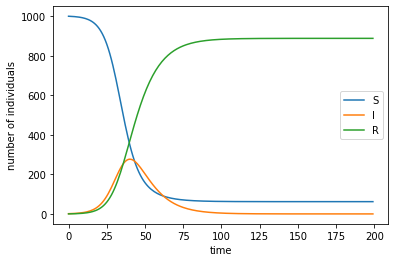

In [4]:
S = 1000
I = 1
R = 0
beta = 0.3
gamma = 0.1
steps = 200

data = []

for _ in range(steps):
  S, I, R = iteration(S, I, R, beta, gamma)
  data.append([S, I, R])

plt.plot(data)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R'))
plt.show()

In [60]:
import matplotlib.pyplot as plt

def lockdowniteration(S, I, R, beta, gamma, u, u_n, u_l, I_threshold, C, C_sum, c_u, c_i):
    S = S - u*beta*(S*I)
    I = I + u*beta*(S*I) - gamma*I
    R = R + gamma*I
    C = c_i*I + (1 - u)*c_u
    if I < I_threshold:
      u = u_n
    else:
      u = u_l

    return S, I, R, u, C, C_sum

In [67]:

def nolockdowniteration(S_n, I_n, R_n, beta, gamma, I_sum):
    S_n = S_n - beta*(S_n*I_n)
    I_n = I_n + beta*(S_n*I_n) - gamma*I_n
    R_n = R_n + gamma*I_n

    return S_n, I_n, R_n, I_sum

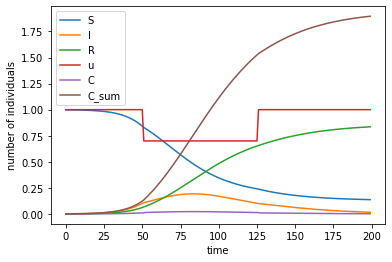

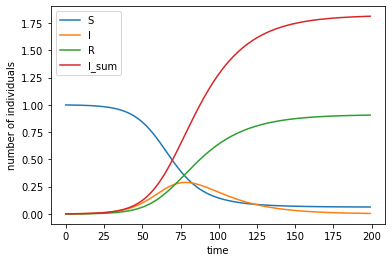

(1.8959152575215585, 1.8120468937919099, 94)

In [70]:
S_n = 0.999
I_n = 0.001
R_n = 0
S = 0.999
I = 0.001
R = 0
C = 0
beta = 0.15
gamma = 0.05
steps = 200
I_threshold = 0.1
u = 1
u_l = 0.7
u_n = 1
C_sum = 0
I_sum = 0
A_sum = 0
A = 0
c_u = 0.01
c_i = 0.1

datalockdown = []
datanolockdown = []

for j in range(0, steps):
  S, I, R, u, C, C_sum = lockdowniteration(S, I, R, beta, gamma, u, u_n, u_l, I_threshold, C, C_sum, c_u, c_i)
  C_sum = C + C_sum
  datalockdown.append([S, I, R, u, C, C_sum]) 

  S_n, I_n, R_n, I_sum = nolockdowniteration(S_n, I_n, R_n, beta, gamma, I_sum)
  I_sum = c_i*I_n + I_sum
  datanolockdown.append([S_n, I_n, R_n, I_sum])

  if C_sum < I_sum:
    A = 1
  else:
    A = 0

  A_sum = A + A_sum

plt.plot(datalockdown)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R', 'u', 'C', 'C_sum'))
plt.show()
plt.plot(datanolockdown)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R', 'I_sum'))
plt.show()
C_sum, I_sum, A_sum

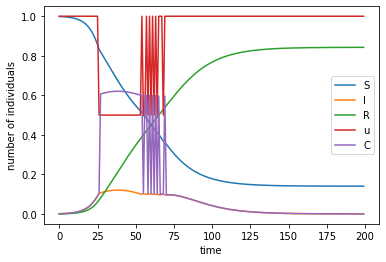

25.92771259320014

In [34]:
S = 0.999
I = 0.001
R = 0
C = 0
beta = 0.3
gamma = 0.1
steps = 200
I_threshold = 0.1
u = 1
u_l = 0.5
u_n = 1
C_sum = 0
I_sum = 0


data = []

for _ in range(steps):
  S, I, R, u, C = lockdowniteration(S, I, R, beta, gamma, u, u_n, u_l, I_threshold, C, C_sum)
  C_sum = C + C_sum
  data.append([S, I, R, u, C])

if I < I_threshold:
  u = 1
else:
  u = 0.9
plt.plot(data)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R', 'u', 'C'))
plt.show()
C_sum